In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

random_state = 0

In [249]:
df = pd.read_csv("/content/processed_data.csv")

In [250]:
df.head()

,text,category,tokens_without_sw,tokens_sw,sentences,sentences_tokens
0,Dharmakīrti (fl. c. 6th or 7th century; Tibeta...,Philosopher,"['dharmakrti', 'fl', 'century', 'tibetan', 'wy...","['dharmakrti', 'fl', 'or', 'century', 'tibetan...","['Dharmakīrti (fl.', 'c.\u20096th or 7th centu...","[['dharmakrti', 'fl'], ['century', 'tibetan', ..."
1,Christina M. Slade (born 1953) is an Australia...,Philosopher,"['christina', 'slade', 'born', 'australian', '...","['christina', 'slade', 'born', 'is', 'an', 'au...",['Christina M. Slade (born 1953) is an Austral...,"[['christina', 'slade', 'born', 'australian', ..."
2,Tsang Lap Chuen (Chinese: 曾立存) is a Chinese ph...,Philosopher,"['tsang', 'lap', 'chuen', 'chinese', 'chinese'...","['tsang', 'lap', 'chuen', 'chinese', 'is', 'a'...",['Tsang Lap Chuen (Chinese: 曾立存) is a Chinese ...,"[['tsang', 'lap', 'chuen', 'chinese', 'chinese..."
3,Callicles (/ˈkælɪkliːz/; Greek: Καλλικλῆς; c....,Philosopher,"['callicles', 'greek', 'late', 'century', 'bc'...","['callicles', 'greek', 'late', 'century', 'bc'...",['Callicles (/ˈkælɪkliːz/; Greek: Καλλικλῆς; ...,"[['callicles', 'greek', 'late', 'century', 'bc..."
4,Sally Haslanger (/ˈhæslæŋər/) is an American p...,Philosopher,"['sally', 'haslanger', 'american', 'philosophe...","['sally', 'haslanger', 'is', 'an', 'american',...",['Sally Haslanger (/ˈhæslæŋər/) is an American...,"[['sally', 'haslanger', 'american', 'philosoph..."


In [251]:
df.describe()

,text,category,tokens_without_sw,tokens_sw,sentences,sentences_tokens
count,6459,6459,6459,6459,6459,6459
unique,6432,2,6432,6432,6432,6432
top,Mario Augusto Bunge (/ˈbʊŋɡeɪ/; Spanish: [ˈbuŋ...,Philosopher,"['mario', 'augusto', 'bunge', 'spanish', 'buxe...","['mario', 'augusto', 'bunge', 'spanish', 'buxe...",['Mario Augusto Bunge (/ˈbʊŋɡeɪ/; Spanish: [ˈb...,"[['mario', 'augusto', 'bunge', 'spanish', 'bux..."
freq,2,3696,2,2,2,2


# Data Preparation

In [252]:
# Create a dict mapping an integer to a category
dic = {}
for top in df['category'].unique():
  dic[len(dic) + 1] = top
print(dic)

{1: 'Philosopher', 2: 'Physicist'}


In [253]:
# Create a reverse dict
dic_revers = {}
for k in dic:
  dic_revers[dic[k]] = k
print(dic_revers)

{'Philosopher': 1, 'Physicist': 2}


In [254]:
# Create a column "label"
def preproc(label):
  return dic_revers[label]

df['label'] = df['category'].apply(preproc)
df['label'].unique()

array([1, 2])

In [255]:
df.head()

,text,category,tokens_without_sw,tokens_sw,sentences,sentences_tokens,label
0,Dharmakīrti (fl. c. 6th or 7th century; Tibeta...,Philosopher,"['dharmakrti', 'fl', 'century', 'tibetan', 'wy...","['dharmakrti', 'fl', 'or', 'century', 'tibetan...","['Dharmakīrti (fl.', 'c.\u20096th or 7th centu...","[['dharmakrti', 'fl'], ['century', 'tibetan', ...",1
1,Christina M. Slade (born 1953) is an Australia...,Philosopher,"['christina', 'slade', 'born', 'australian', '...","['christina', 'slade', 'born', 'is', 'an', 'au...",['Christina M. Slade (born 1953) is an Austral...,"[['christina', 'slade', 'born', 'australian', ...",1
2,Tsang Lap Chuen (Chinese: 曾立存) is a Chinese ph...,Philosopher,"['tsang', 'lap', 'chuen', 'chinese', 'chinese'...","['tsang', 'lap', 'chuen', 'chinese', 'is', 'a'...",['Tsang Lap Chuen (Chinese: 曾立存) is a Chinese ...,"[['tsang', 'lap', 'chuen', 'chinese', 'chinese...",1
3,Callicles (/ˈkælɪkliːz/; Greek: Καλλικλῆς; c....,Philosopher,"['callicles', 'greek', 'late', 'century', 'bc'...","['callicles', 'greek', 'late', 'century', 'bc'...",['Callicles (/ˈkælɪkliːz/; Greek: Καλλικλῆς; ...,"[['callicles', 'greek', 'late', 'century', 'bc...",1
4,Sally Haslanger (/ˈhæslæŋər/) is an American p...,Philosopher,"['sally', 'haslanger', 'american', 'philosophe...","['sally', 'haslanger', 'is', 'an', 'american',...",['Sally Haslanger (/ˈhæslæŋər/) is an American...,"[['sally', 'haslanger', 'american', 'philosoph...",1


In [256]:
df.label.value_counts(normalize=True)

1    0.572225
2    0.427775
Name: label, dtype: float64

In [258]:
# Split the data into training and testing sets
X = df['tokens_without_sw']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [259]:
# Using TFIDF vectorizer to convert words to vectors
tfidf_vectorizer = TfidfVectorizer(max_features=1000,
                                    use_idf=True,
                                    ngram_range=(1, 3))
# Fit the vectorizer to train and test data
X_train_vec = tfidf_vectorizer.fit_transform(X_train)
X_test_vec = tfidf_vectorizer.transform(X_test)

In [260]:
# Printing out the features
features = tfidf_vectorizer.get_feature_names_out()
print(features)

['ability' 'able' 'absolute' 'academic' 'academy' 'academy science'
 'accepted' 'according' 'account' 'achievement' 'act' 'action' 'active'
 'activity' 'adam' 'addition' 'advanced' 'aesthetic' 'affair' 'age' 'air'
 'albert' 'alexander' 'allowed' 'almost' 'along' 'already' 'also'
 'although' 'always' 'america' 'american' 'among' 'analysis' 'ancient'
 'animal' 'another' 'appeared' 'appears' 'application' 'applied'
 'appointed' 'appointment' 'approach' 'april' 'area' 'argued' 'argues'
 'argument' 'aristotle' 'army' 'around' 'art' 'article' 'asked' 'aspect'
 'assistant' 'associate' 'associated' 'association' 'astronomy' 'atomic'
 'attack' 'attempt' 'attended' 'attention' 'attributed' 'august' 'author'
 'authority' 'award' 'awarded' 'away' 'bachelor' 'back' 'based' 'basic'
 'basis' 'bc' 'became' 'become' 'becoming' 'began' 'beginning' 'being'
 'belief' 'believe' 'believed' 'berkeley' 'berlin' 'best' 'best known'
 'better' 'beyond' 'biography' 'birth' 'bishop' 'black' 'board' 'body'
 'bohr' 

In [261]:
print('Train:', X_train_vec.shape)
print('Test:', X_test_vec.shape)
print('Vocabulary size:', len(tfidf_vectorizer.vocabulary_))

Train: (5167, 1000)
Test: (1292, 1000)
Vocabulary size: 1000


# Training and Testing Classifiers

## Perceptron

In [262]:
clf = Perceptron(random_state=0)

# Train  the model
clf.fit(X_train_vec, y_train)

# Predict the labels of the test instances
y_pred = clf.predict(X_test_vec)

In [263]:
# Evaluating a classifier
print('Classification report:', '\n', classification_report(y_test, y_pred, digits=3))
f1_perceptron = f1_score(y_test, y_pred)

Classification report: 
               precision    recall  f1-score   support

           1      0.952     0.992     0.972       747
           2      0.988     0.932     0.959       545

    accuracy                          0.967      1292
   macro avg      0.970     0.962     0.966      1292
weighted avg      0.968     0.967     0.967      1292



In [264]:
# Print the confusion matrix
cm_perceptron = confusion_matrix(y_test, y_pred)
print('Confusion matrix:', '\n', cm_perceptron)

Confusion matrix: 
 [[741   6]
 [ 37 508]]


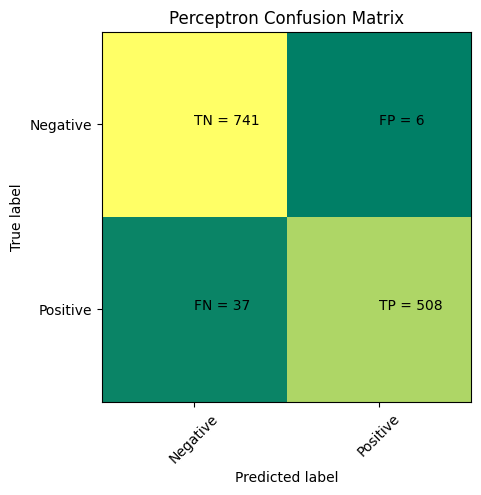

In [265]:
# Print the confusion matrix in a pretty way
plt.clf()
plt.imshow(cm_perceptron, interpolation='nearest', cmap=plt.cm.summer)
class_names = ['Negative','Positive']
plt.title('Perceptron Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_perceptron[i][j]))
plt.show()

### Perceptron with K-fold

In [266]:
# Do the same steps as above, but this time with K-fold cross validation
# Check for overfitting (as above we've got pretty good results)

X = df['tokens_sw']
y = df['label']

tfidf_vectorizer = TfidfVectorizer(max_features=1000,
                                    use_idf=True,
                                    ngram_range=(1, 3))

X_vec = tfidf_vectorizer.fit_transform(X)

clf = Perceptron(max_iter=5,random_state=0, tol=None)

scores = cross_validate(clf, X_vec, y, cv=5, scoring='f1')

print("%0.3f f1 with a standard deviation of %0.3f" % (scores['test_score'].mean(), scores['test_score'].std()))

0.977 f1 with a standard deviation of 0.007


## Logistic Regression

In [267]:
clf_log = LogisticRegression(random_state=0)

# Train  the model
clf_log.fit(X_train_vec, y_train)

# Predict the labels of the test instances
y_pred = clf_log.predict(X_test_vec)

# Evaluating a classifier
print('Classification report:', '\n', classification_report(y_test, y_pred, digits=3))
f1_logreg = f1_score(y_test, y_pred)

Classification report: 
               precision    recall  f1-score   support

           1      0.988     0.988     0.988       747
           2      0.983     0.983     0.983       545

    accuracy                          0.986      1292
   macro avg      0.986     0.986     0.986      1292
weighted avg      0.986     0.986     0.986      1292



In [268]:
# Print the confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred)
print('Confusion matrix:', '\n', cm_logreg)

Confusion matrix: 
 [[738   9]
 [  9 536]]


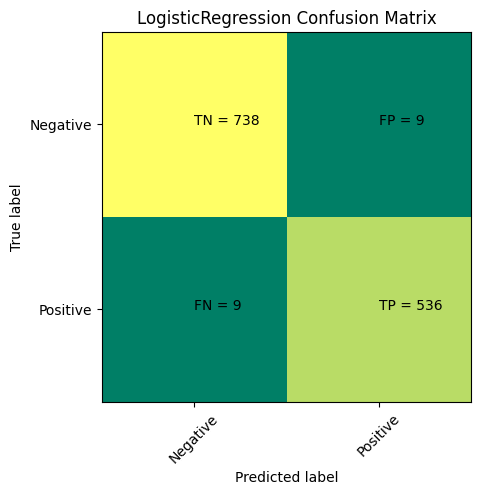

In [269]:
# Print the confusion matrix in a pretty way
plt.clf()
plt.imshow(cm_logreg, interpolation='nearest', cmap=plt.cm.summer)
class_names = ['Negative','Positive']
plt.title('LogisticRegression Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_logreg[i][j]))
plt.show()

## Decision Tree

In [270]:
clf_dt = DecisionTreeClassifier(random_state=0)

# Train  the model
clf_dt.fit(X_train_vec, y_train)

# Predict the labels of the test instances
y_pred = clf_dt.predict(X_test_vec)

# Evaluating a classifier
print('Classification report:', '\n', classification_report(y_test, y_pred, digits=3))
f1_decisiontree = f1_score(y_test, y_pred)

Classification report: 
               precision    recall  f1-score   support

           1      0.966     0.963     0.964       747
           2      0.949     0.954     0.952       545

    accuracy                          0.959      1292
   macro avg      0.958     0.958     0.958      1292
weighted avg      0.959     0.959     0.959      1292



In [271]:
# Print the confusion matrix
cm_decisiontree = confusion_matrix(y_test, y_pred)
print('Confusion matrix:', '\n', cm_decisiontree)

Confusion matrix: 
 [[719  28]
 [ 25 520]]


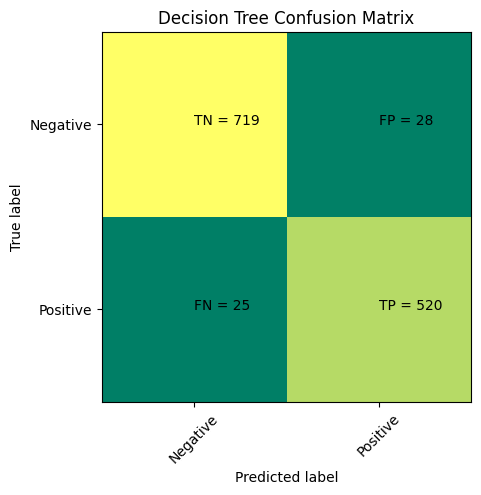

In [272]:
# Print the confusion matrix in a pretty way
plt.clf()
plt.imshow(cm_decisiontree, interpolation='nearest', cmap=plt.cm.summer)
class_names = ['Negative','Positive']
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_decisiontree[i][j]))
plt.show()

## Multinimonal Naive Bayes

In [274]:
clf_nb = MultinomialNB()

# Train  the model
clf_nb.fit(X_train_vec, y_train)

# Predict the labels of the test instances
y_pred = clf_nb.predict(X_test_vec)

# Evaluating a classifier
print('Classification report:', '\n', classification_report(y_test, y_pred, digits=3))
f1_nb = f1_score(y_test, y_pred)

Classification report: 
               precision    recall  f1-score   support

           1      0.981     0.983     0.982       747
           2      0.976     0.974     0.975       545

    accuracy                          0.979      1292
   macro avg      0.979     0.978     0.979      1292
weighted avg      0.979     0.979     0.979      1292



In [275]:
# Print the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred)
print('Confusion matrix:', '\n', cm_nb)

Confusion matrix: 
 [[734  13]
 [ 14 531]]


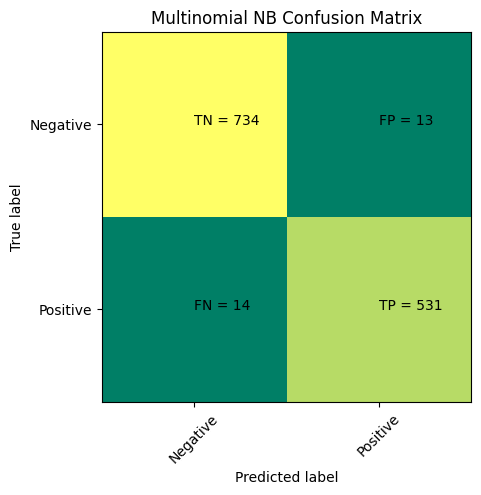

In [276]:
# Print the confusion matrix in a pretty way
plt.clf()
plt.imshow(cm_nb, interpolation='nearest', cmap=plt.cm.summer)
class_names = ['Negative','Positive']
plt.title('Multinomial NB Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_nb[i][j]))
plt.show()

## Random Forest

In [277]:
clf_rf = RandomForestClassifier(random_state=0)

# Train  the model
clf_rf.fit(X_train_vec, y_train)

# Predict the labels of the test instances
y_pred = clf_rf.predict(X_test_vec)

# Evaluating a classifier
print('Classification report:', '\n', classification_report(y_test, y_pred, digits=3))
f1_randomforest = f1_score(y_test, y_pred)

Classification report: 
               precision    recall  f1-score   support

           1      0.985     0.985     0.985       747
           2      0.980     0.980     0.980       545

    accuracy                          0.983      1292
   macro avg      0.983     0.983     0.983      1292
weighted avg      0.983     0.983     0.983      1292



In [278]:
# Print the confusion matrix
cm_randomforest = confusion_matrix(y_test, y_pred)
print('Confusion matrix:', '\n', cm_randomforest)

Confusion matrix: 
 [[736  11]
 [ 11 534]]


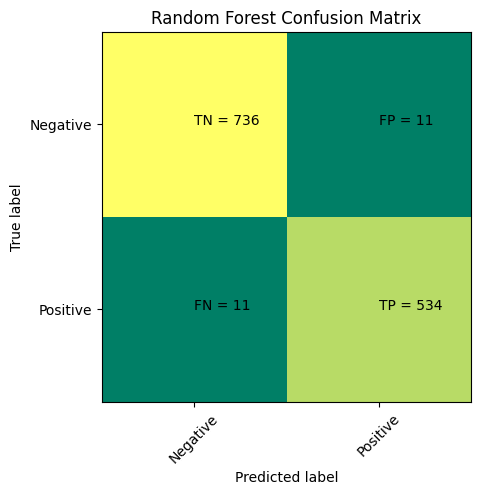

In [279]:
# Print the confusion matrix in a pretty way
plt.clf()
plt.imshow(cm_randomforest, interpolation='nearest', cmap=plt.cm.summer)
class_names = ['Negative','Positive']
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_randomforest[i][j]))
plt.show()

## Compare the models

In [280]:
# Compare models using f1 score
print("Logistic Regression: {}\nPerceptron: {}\nDecision Tree: {}\nRandom Forest: {}\nMultinominal NB: {}".format(
    f1_logreg,
    f1_perceptron,
    f1_decisiontree,
    f1_randomforest,
    f1_nb), sep='/n')

Logistic Regression: 0.9879518072289156
Perceptron: 0.9718032786885247
Decision Tree: 0.9644533869885983
Random Forest: 0.9852744310575636
Multinominal NB: 0.9819397993311038


### Multinimonal Naive Bayes with GridSearchCV

In [281]:
# As Multinominam NB showed the worst results, let's try to fine-tune the model (maybe we can get the best results across all the models??)
parameters = [a for a in np.linspace(0.01,1,11)]

clf = GridSearchCV(estimator=MultinomialNB(), 
                   param_grid={'alpha':parameters},
                   scoring='f1',
                   return_train_score=True,
                   cv=5, 
                  )

# Start the search over the hyperparameters
clf.fit(X_train_vec, y_train)

# Print the results
cv_res = pd.DataFrame(clf.cv_results_)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012033,0.003234,0.003918,0.000184,0.01,{'alpha': 0.01},0.968934,0.968986,0.973154,0.978114,...,0.972075,0.003401,7,0.974542,0.974327,0.973668,0.972666,0.972871,0.973615,0.000751
1,0.010747,0.000387,0.004098,0.000232,0.109,{'alpha': 0.109},0.968067,0.969799,0.973154,0.977254,...,0.971718,0.003215,9,0.974542,0.974100,0.973451,0.972234,0.972655,0.973396,0.000862
2,0.010765,0.000352,0.004972,0.001746,0.208,{'alpha': 0.20800000000000002},0.968067,0.969799,0.972292,0.977254,...,0.971545,0.003156,11,0.973895,0.973656,0.973224,0.972655,0.972655,0.973217,0.000507
3,0.010431,0.000510,0.004169,0.000397,0.307,{'alpha': 0.30700000000000005},0.968067,0.969799,0.972292,0.978078,...,0.971710,0.003457,10,0.973884,0.973645,0.973623,0.972427,0.973269,0.973370,0.000511
4,0.010428,0.000358,0.003985,0.000124,0.406,{'alpha': 0.406},0.968881,0.970613,0.972292,0.978078,...,0.972036,0.003210,8,0.974089,0.973645,0.974034,0.972620,0.973463,0.973570,0.000530
5,0.010609,0.000459,0.003926,0.000146,0.505,{'alpha': 0.505},0.968881,0.970563,0.973109,0.978078,...,0.972189,0.003244,6,0.974283,0.974045,0.973818,0.973235,0.973463,0.973769,0.000380
6,0.011018,0.000782,0.004854,0.000973,0.604,{'alpha': 0.6040000000000001},0.968013,0.970563,0.973928,0.978903,...,0.972509,0.003709,5,0.974283,0.974251,0.973818,0.973224,0.973246,0.973764,0.000462
7,0.010181,0.000598,0.003826,0.000216,0.703,{'alpha': 0.7030000000000001},0.968829,0.970563,0.974747,0.978903,...,0.972661,0.003692,3,0.974272,0.974662,0.973384,0.973429,0.973656,0.973881,0.000503
8,0.011044,0.001415,0.004455,0.000750,0.802,{'alpha': 0.802},0.968829,0.970563,0.974747,0.978903,...,0.972651,0.003698,4,0.974056,0.974857,0.973590,0.973418,0.973851,0.973954,0.000502
9,0.010892,0.000363,0.003999,0.000121,0.901,{'alpha': 0.901},0.969646,0.971429,0.974705,0.978903,...,0.972979,0.003442,1,0.974262,0.974641,0.973362,0.973623,0.973851,0.973948,0.000455


In [282]:
# Print the best score
print("Best score: %0.3f" % clf.best_score_)

# Print the best alpha
best_parameters = clf.best_estimator_.get_params()
print("Best alpha", best_parameters['alpha'])

Best score: 0.973
Best alpha 0.901


# Training and Testing Top-2 Classifiers

## CountVectorizer

In [283]:
# Split the data into training and testing sets
X = df['tokens_without_sw']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [284]:
# Using CountVectorizer to convert words to vectors

count_vectorizer = CountVectorizer(max_features=1000,
                                   analyzer='word', 
                                   ngram_range=(1, 3))
# Fit the vectorizer to train and test data
X_train_vec = count_vectorizer.fit_transform(X_train)
X_test_vec = count_vectorizer.transform(X_test)

In [285]:
# Printing out the features
features = count_vectorizer.get_feature_names_out()
print(features)

['ability' 'able' 'absolute' 'academic' 'academy' 'academy science'
 'accepted' 'according' 'account' 'achievement' 'act' 'action' 'active'
 'activity' 'adam' 'addition' 'advanced' 'aesthetic' 'affair' 'age' 'air'
 'albert' 'alexander' 'allowed' 'almost' 'along' 'already' 'also'
 'although' 'always' 'america' 'american' 'among' 'analysis' 'ancient'
 'animal' 'another' 'appeared' 'appears' 'application' 'applied'
 'appointed' 'appointment' 'approach' 'april' 'area' 'argued' 'argues'
 'argument' 'aristotle' 'army' 'around' 'art' 'article' 'asked' 'aspect'
 'assistant' 'associate' 'associated' 'association' 'astronomy' 'atomic'
 'attack' 'attempt' 'attended' 'attention' 'attributed' 'august' 'author'
 'authority' 'award' 'awarded' 'away' 'bachelor' 'back' 'based' 'basic'
 'basis' 'bc' 'became' 'become' 'becoming' 'began' 'beginning' 'being'
 'belief' 'believe' 'believed' 'berkeley' 'berlin' 'best' 'best known'
 'better' 'beyond' 'biography' 'birth' 'bishop' 'black' 'board' 'body'
 'bohr' 

### Logistic Regression with GridSearchCV

In [286]:
parameters = {
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'], 
    'C'       : [100, 10, 1.0, 0.1, 0.01],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

logreg = LogisticRegression(random_state=0)
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='f1',              # metric for scoring
                   cv=5)                      # number of folds

clf.fit(X_train_vec, y_train)

print("Tuned Hyperparameters: ", clf.best_params_)
print("F1: ", clf.best_score_)

Tuned Hyperparameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
F1:  0.9819027120091647


In [327]:
# Using the best parameters
clf_log = LogisticRegression(C=0.01, penalty='l2', solver='liblinear', random_state=0)

# Train  the model
clf_log.fit(X_train_vec, y_train)

# Predict the labels of the test instances
y_pred = clf_log.predict(X_test_vec)

# Evaluating a classifier
print('Classification report:', '\n', classification_report(y_test, y_pred, digits=3))
f1_logreg_count = f1_score(y_test, y_pred)

Classification report: 
               precision    recall  f1-score   support

           1      0.898     0.999     0.946       747
           2      0.998     0.844     0.915       545

    accuracy                          0.933      1292
   macro avg      0.948     0.921     0.930      1292
weighted avg      0.940     0.933     0.932      1292



In [292]:
# Print the confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred)
print('Confusion matrix:', '\n', cm_logreg)

Confusion matrix: 
 [[732  15]
 [  6 539]]


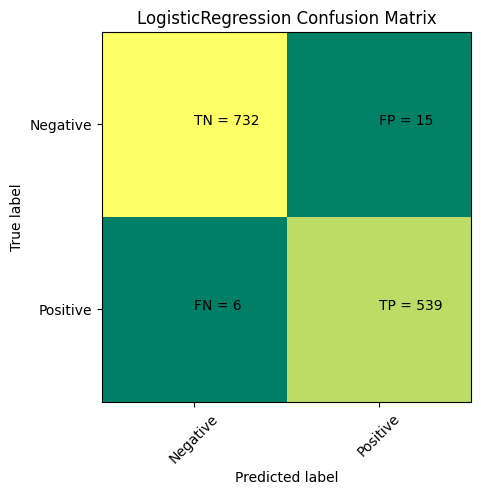

In [293]:
# Print the confusion matrix in a pretty way
plt.clf()
plt.imshow(cm_logreg, interpolation='nearest', cmap=plt.cm.summer)
class_names = ['Negative','Positive']
plt.title('LogisticRegression Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_logreg[i][j]))
plt.show()

### Random Forest with GridSearchCV

In [307]:
parameters = {
    # 'max_depth': list(range(10, 15)), 
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
}


rf = RandomForestClassifier(random_state=0)
clf = GridSearchCV(rf,                     # model
                   param_grid = parameters,   # hyperparameters
                   scoring='f1',              # metric for scoring
                   cv=5)                     # number of folds

clf.fit(X_train_vec, y_train)

print("Tuned Hyperparameters: ", clf.best_params_)
print("F1: ", clf.best_score_)

Tuned Hyperparameters:  {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 200}
F1:  0.9819811193364576


In [308]:
# Using the best parameters
clf_rf = RandomForestClassifier(criterion='gini', max_features='sqrt', n_estimators=200, random_state=0)

# Train  the model
clf_rf.fit(X_train_vec, y_train)

# Predict the labels of the test instances
y_pred = clf_rf.predict(X_test_vec)

# Evaluating a classifier
print('Classification report:', '\n', classification_report(y_test, y_pred, digits=3))
f1_randomforest_count = f1_score(y_test, y_pred)

Classification report: 
               precision    recall  f1-score   support

           1      0.985     0.984     0.985       747
           2      0.978     0.980     0.979       545

    accuracy                          0.982      1292
   macro avg      0.982     0.982     0.982      1292
weighted avg      0.982     0.982     0.982      1292



In [309]:
# Print the confusion matrix
cm_randomforest = confusion_matrix(y_test, y_pred)
print('Confusion matrix:', '\n', cm_randomforest)

Confusion matrix: 
 [[735  12]
 [ 11 534]]


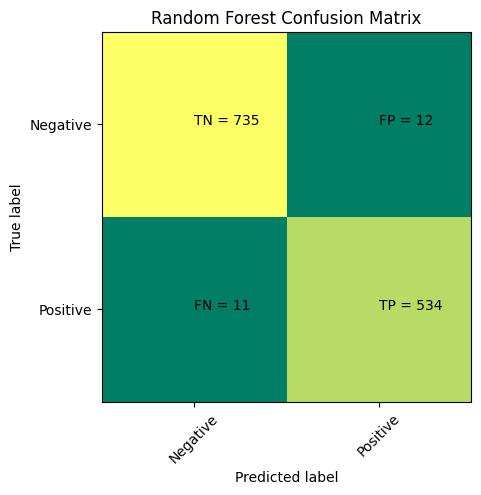

In [310]:
# Print the confusion matrix in a pretty way
plt.clf()
plt.imshow(cm_randomforest, interpolation='nearest', cmap=plt.cm.summer)
class_names = ['Negative','Positive']
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_randomforest[i][j]))
plt.show()

## TFIDF Vectorizer

In [311]:
# Using TFIDF vectorizer to convert words to vectors
tfidf_vectorizer = TfidfVectorizer(max_features=1000,
                                    use_idf=True,
                                    ngram_range=(1, 3))
# Fit the vectorizer to train and test data
X_train_vec = tfidf_vectorizer.fit_transform(X_train)
X_test_vec = tfidf_vectorizer.transform(X_test)

In [312]:
# Printing out the features
features = tfidf_vectorizer.get_feature_names_out()
print(features)

['ability' 'able' 'absolute' 'academic' 'academy' 'academy science'
 'accepted' 'according' 'account' 'achievement' 'act' 'action' 'active'
 'activity' 'adam' 'addition' 'advanced' 'aesthetic' 'affair' 'age' 'air'
 'albert' 'alexander' 'allowed' 'almost' 'along' 'already' 'also'
 'although' 'always' 'america' 'american' 'among' 'analysis' 'ancient'
 'animal' 'another' 'appeared' 'appears' 'application' 'applied'
 'appointed' 'appointment' 'approach' 'april' 'area' 'argued' 'argues'
 'argument' 'aristotle' 'army' 'around' 'art' 'article' 'asked' 'aspect'
 'assistant' 'associate' 'associated' 'association' 'astronomy' 'atomic'
 'attack' 'attempt' 'attended' 'attention' 'attributed' 'august' 'author'
 'authority' 'award' 'awarded' 'away' 'bachelor' 'back' 'based' 'basic'
 'basis' 'bc' 'became' 'become' 'becoming' 'began' 'beginning' 'being'
 'belief' 'believe' 'believed' 'berkeley' 'berlin' 'best' 'best known'
 'better' 'beyond' 'biography' 'birth' 'bishop' 'black' 'board' 'body'
 'bohr' 

In [313]:
print('Train:', X_train_vec.shape)
print('Test:', X_test_vec.shape)
print('Vocabulary size:', len(tfidf_vectorizer.vocabulary_))

Train: (5167, 1000)
Test: (1292, 1000)
Vocabulary size: 1000


### Logistic Regression with GridSearchCV

In [314]:
parameters = {
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'], 
    'C'       : [100, 10, 1.0, 0.1, 0.01],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

logreg = LogisticRegression(random_state=0)
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='f1',              # metric for scoring
                   cv=5)                     # number of folds

clf.fit(X_train_vec, y_train)

print("Tuned Hyperparameters: ", clf.best_params_)
print("F1: ", clf.best_score_)

Tuned Hyperparameters:  {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
F1:  0.9828027748309877


In [315]:
# Using the best parameters
clf_log = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=0)

# Train  the model
clf_log.fit(X_train_vec, y_train)

# Predict the labels of the test instances
y_pred = clf_log.predict(X_test_vec)

# Evaluating a classifier
print('Classification report:', '\n', classification_report(y_test, y_pred, digits=3))
f1_logreg_tfidf = f1_score(y_test, y_pred)

Classification report: 
               precision    recall  f1-score   support

           1      0.988     0.988     0.988       747
           2      0.983     0.983     0.983       545

    accuracy                          0.986      1292
   macro avg      0.986     0.986     0.986      1292
weighted avg      0.986     0.986     0.986      1292



In [316]:
# Print the confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred)
print('Confusion matrix:', '\n', cm_logreg)

Confusion matrix: 
 [[738   9]
 [  9 536]]


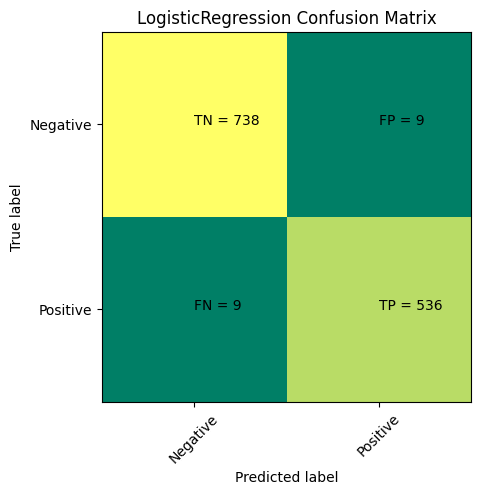

In [317]:
# Print the confusion matrix in a pretty way
plt.clf()
plt.imshow(cm_logreg, interpolation='nearest', cmap=plt.cm.summer)
class_names = ['Negative','Positive']
plt.title('LogisticRegression Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_logreg[i][j]))
plt.show()

### Random Forest with GridSearchCV

In [306]:
parameters = {
    # 'max_depth': list(range(10, 15)), 
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
}


rf = RandomForestClassifier(random_state=0)
clf = GridSearchCV(rf,                        # model
                   param_grid = parameters,   # hyperparameters
                   scoring='f1',              # metric for scoring
                   cv=5)                     # number of folds

clf.fit(X_train_vec, y_train)

print("Tuned Hyperparameters: ", clf.best_params_)
print("F1: ", clf.best_score_)

Tuned Hyperparameters:  {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 200}
F1:  0.9819811193364576


In [319]:
# Using the best parameters
clf_rf = RandomForestClassifier(criterion='gini', max_features='sqrt', n_estimators=200, random_state=0)

# Train  the model
clf_rf.fit(X_train_vec, y_train)

# Predict the labels of the test instances
y_pred = clf_rf.predict(X_test_vec)

# Evaluating a classifier
print('Classification report:', '\n', classification_report(y_test, y_pred, digits=3))
f1_randomforest_tfidf = f1_score(y_test, y_pred)

Classification report: 
               precision    recall  f1-score   support

           1      0.985     0.984     0.985       747
           2      0.978     0.980     0.979       545

    accuracy                          0.982      1292
   macro avg      0.982     0.982     0.982      1292
weighted avg      0.982     0.982     0.982      1292



In [320]:
# Print the confusion matrix
cm_randomforest = confusion_matrix(y_test, y_pred)
print('Confusion matrix:', '\n', cm_randomforest)

Confusion matrix: 
 [[735  12]
 [ 11 534]]


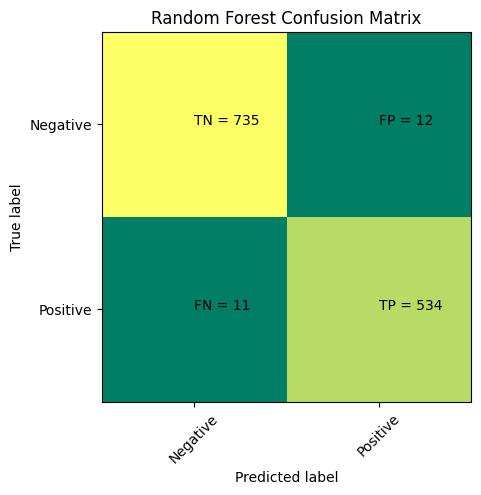

In [321]:
# Print the confusion matrix in a pretty way
plt.clf()
plt.imshow(cm_randomforest, interpolation='nearest', cmap=plt.cm.summer)
classNames = ['Negative','Positive']
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_randomforest[i][j]))
plt.show()

## Compare models

In [328]:
# Compare models using f1 score
print("Logistic Regression (CountVectorizer + GridSearchCV): {}\nRandom Forest (CountVectorizer + GridSearchCV): {}\nLogistic Regression (TFIDFVectorizer + GridSearchCV) {}\nRandom Forest (TFIDFVectorizer + GridSearchCV): {}".format(
    f1_logreg_count,
    f1_randomforest_count,
    f1_logreg_tfidf,
    f1_randomforest_tfidf), sep='/n')
# The best model - Logistic Regression (TFIDFVectorizer + GridSearchCV)

Logistic Regression (CountVectorizer + GridSearchCV): 0.9455006337135614
Random Forest (CountVectorizer + GridSearchCV): 0.984594775619558
Logistic Regression (TFIDFVectorizer + GridSearchCV) 0.9879518072289156
Random Forest (TFIDFVectorizer + GridSearchCV): 0.984594775619558
